In [102]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import scipy
from scipy.signal import find_peaks

plt.style.use('moje.mplstyle')

In [103]:
UR = np.genfromtxt(r'C:\Users\z003zh2j\Desktop\PLOT\eqn\hyur.csv', delimiter=',', skip_header=1)

t = UR[: , 0]/1e6
u = UR[: , 1]/30
r = UR[: , 2]/1e3

In [104]:
ABR = np.genfromtxt(r'C:\Users\z003zh2j\Desktop\PLOT\eqn\hyab.csv', delimiter=',', skip_header=1)

tt = ABR[: , 0]/1e6
a = ABR[: , 1]/1e3
b = ABR[: , 2]/1e3

In [105]:
try:
  def pnej(seznam):
    peaks, _ = find_peaks(-seznam, height=-0.01)
    indexy = t[peaks[0]]
    return indexy                
except IndexError:
  R = 50

R = pnej(r)

def timel(leng,okno,jaky):
    if jaky == "R":
        jaky = R

    N1 = np.linspace(jaky-(-1 * ((leng-1) /2)) * okno , jaky-((leng-1) /2)* okno,leng)
    N2 = np.linspace(-1 * ((leng-1) /2) * okno , ((leng-1) /2) * okno,leng)
    N1 = N1.tolist()
    N1.sort()
    N2 = N2.tolist()
    N2 = ["%.2f" % member for member in N2]

    return(N1,N2)

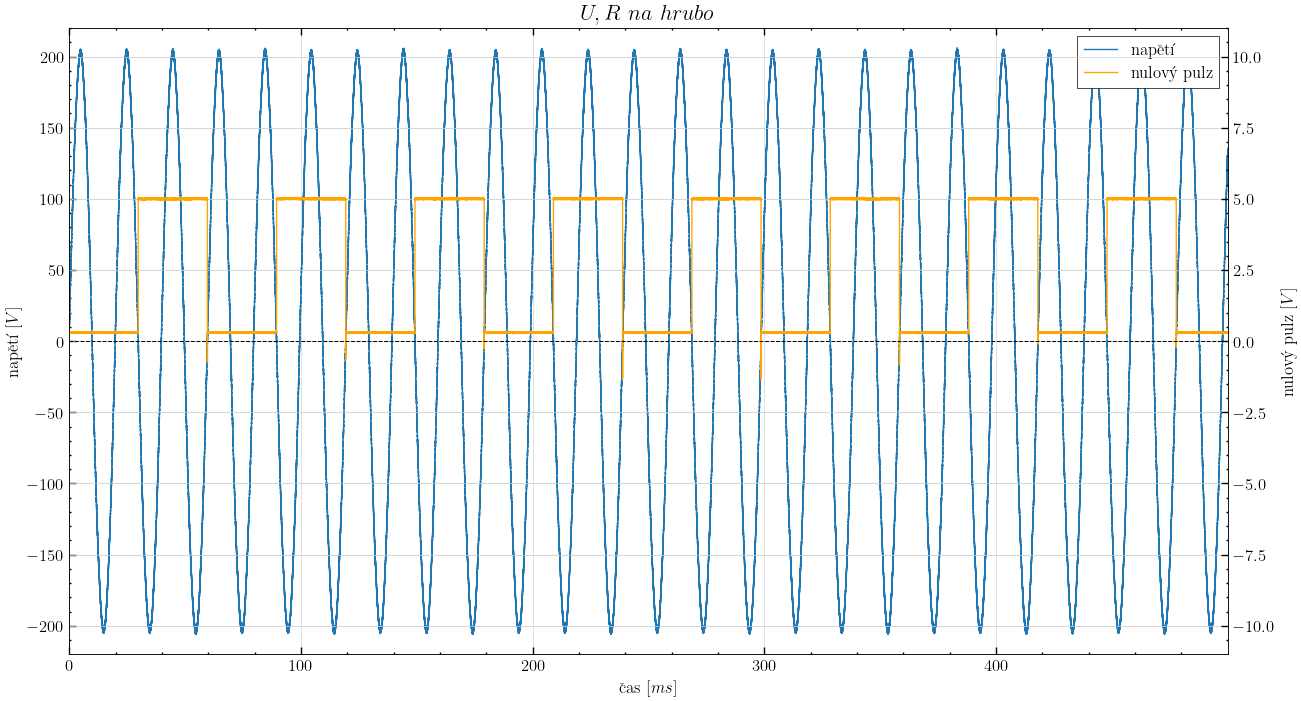

In [106]:
fig, host = plt.subplots(figsize=(13,7), layout='constrained')
ax2 = host.twinx()  
host.set_xlim(0, t[-1])
host.set_ylim(-220, 220)
ax2.set_ylim(-11, 11)

host.set_xlabel("čas $[ms]$", fontsize=12)
host.set_ylabel("napětí $[V]$", fontsize=12)
ax2.set_ylabel("nulový pulz $[V]$", fontsize=12)

p1 = host.plot(t, u, label="napětí")
p2 = ax2.plot(t, r, label="nulový pulz", color='orange')

plt.hlines(0.00075/2,0, t[-1], color = 'k', linestyles='--',lw = 0.75)

# plt.title("U,R na hrubo")
plt.title(r"$U,R$ $na$ $hrubo$", fontsize=16, color='k')
host.legend(handles=p1+p2, loc='upper right')
# host.set_yticks(np.arange(-120, 140, step=40))
host.yaxis.label.set_color(p1[0].get_color())
ax2.yaxis.label.set_color(p2[0].get_color())
# host.grid(color='lightgrey', linestyle='-', linewidth=0.5)
host.set_xlabel("čas $[ms]$", fontsize=12, color = 'k')
host.set_ylabel("napětí $[V]$", fontsize=12, color = 'k')
ax2.set_ylabel("nulový pulz $[V]$", fontsize=12, color = 'k')
# ax = plt.gca()
# ax.spines['bottom'].set_color('k')
# ax.spines['top'].set_color('k') 
# ax.spines['right'].set_color(p2[0].get_color())
# ax.spines['left'].set_color(p1[0].get_color())

plt.savefig("eqn_ur-h.png")

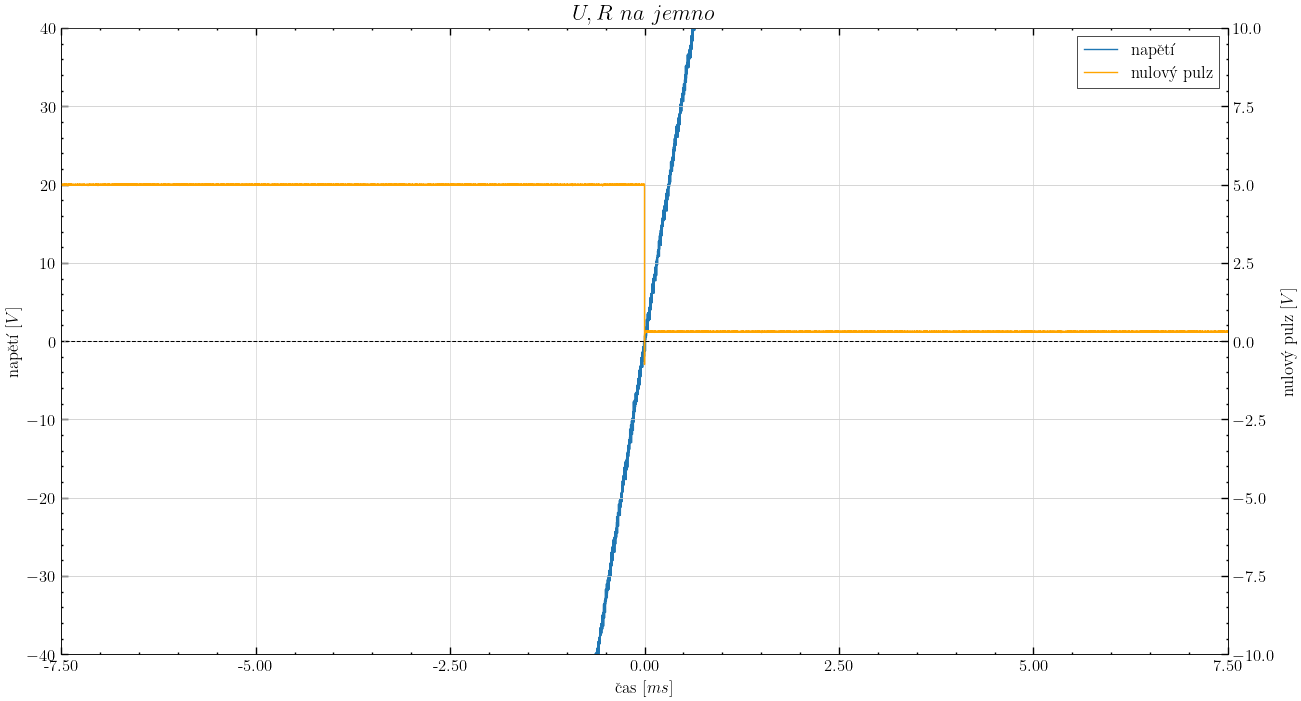

In [107]:
fig, host = plt.subplots(figsize=(13,7), layout='constrained')
ax2 = host.twinx()
ax = plt.gca()
    
host.set_xlim(R-7.5, R+7.5)
host.set_ylim(-40, 40)
ax2.set_ylim(-10, 10)

p1 = host.plot(t, u, label="napětí")
p2 = ax2.plot(t, r, label="nulový pulz", color='orange')
# ax2.set_yticks(np.arange(-0.5, 0.5+0.5/4, step=0.5/4))
plt.hlines(0,0,t[-1],color = 'k', linestyles='--',lw = 0.75)
plt.title("$U,R$ $na$ $jemno$", fontsize=16, color='k')
host.legend(handles=p1+p2, loc='upper right')
host.set_yticks(np.arange(-40, 50, step=10))
host.yaxis.label.set_color(p1[0].get_color())
ax2.yaxis.label.set_color(p2[0].get_color())


# ax.set_xticks([R,R-0.2,R+0.2,R-0.4,R+0.4,R-0.6,R+0.6]) 
# ax.set_xticklabels(['0',"-0.2","0.2","-0.4","0.4","-0.6","0.6"])
N1 , N2 = timel(7,2.5,"R")
ax.set_xticks(N1) 
ax.set_xticklabels(N2)
host.set_xlabel("čas $[ms]$", fontsize=12, color = 'k')
host.set_ylabel("napětí $[V]$", fontsize=12, color = 'k')
ax2.set_ylabel("nulový pulz $[V]$", fontsize=12, color = 'k')
# plt.show()
plt.savefig("eqn_ur.png")

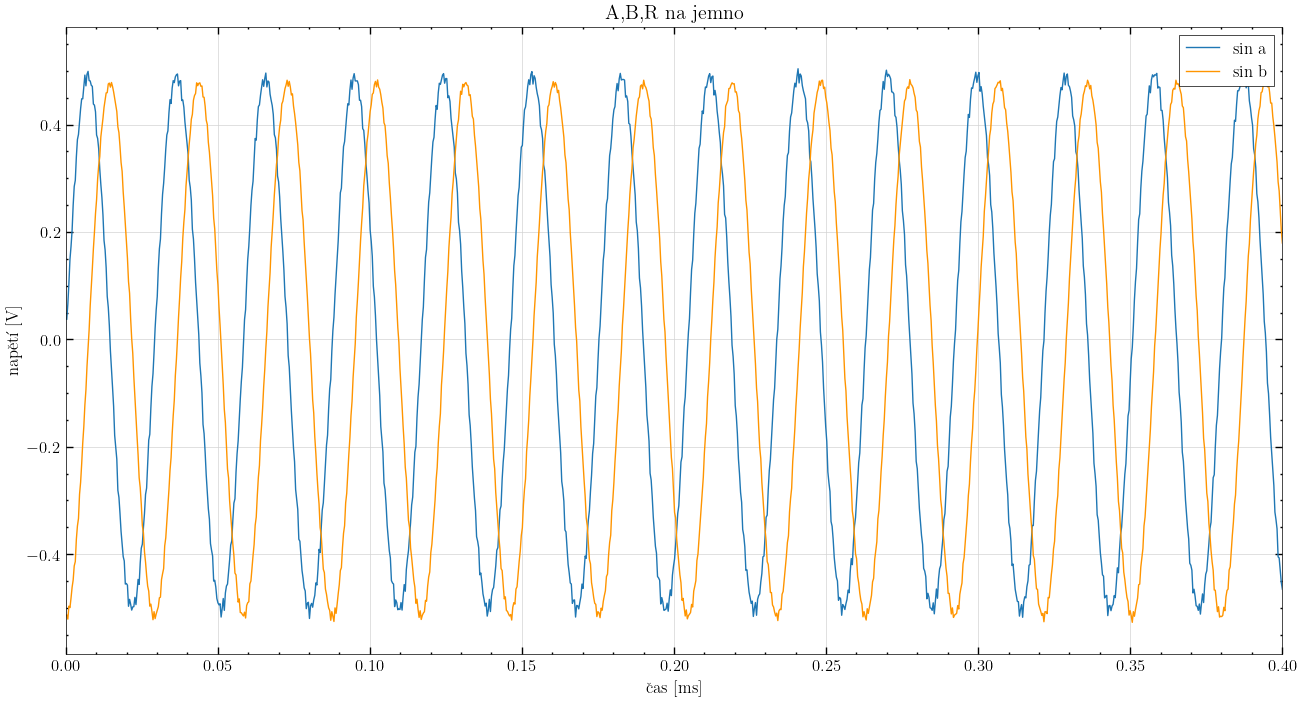

In [108]:
fig, host = plt.subplots(figsize=(13,7), layout='constrained')
ax = plt.gca()
plt.title("A,B,R na jemno")
p1 = plt.plot(tt,a, label="sin a")
p2 = plt.plot(tt,b, label="sin b")
plt.xlim(0,0.4)
host.set_xlabel("čas [ms]")
host.set_ylabel("napětí [V]")
host.legend(handles=p1+p2, loc='upper right')
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
# # plt.show()
# ax.set_xticks([RR,RR-0.2,RR+0.2,RR-0.1,RR+0.1])#,RR-0.4,RR+0.4,RR-0.6,RR+0.6]) 
# ax.set_xticklabels(['0',"-0.2","0.2","-0.1","0.1"])#,"-0.4","+0.4","-0.6","+0.6"])
# ax.set_xticks(N1) 
# ax.set_xticklabels(N2)

# plt.show()
plt.savefig("eqn_ab.png")

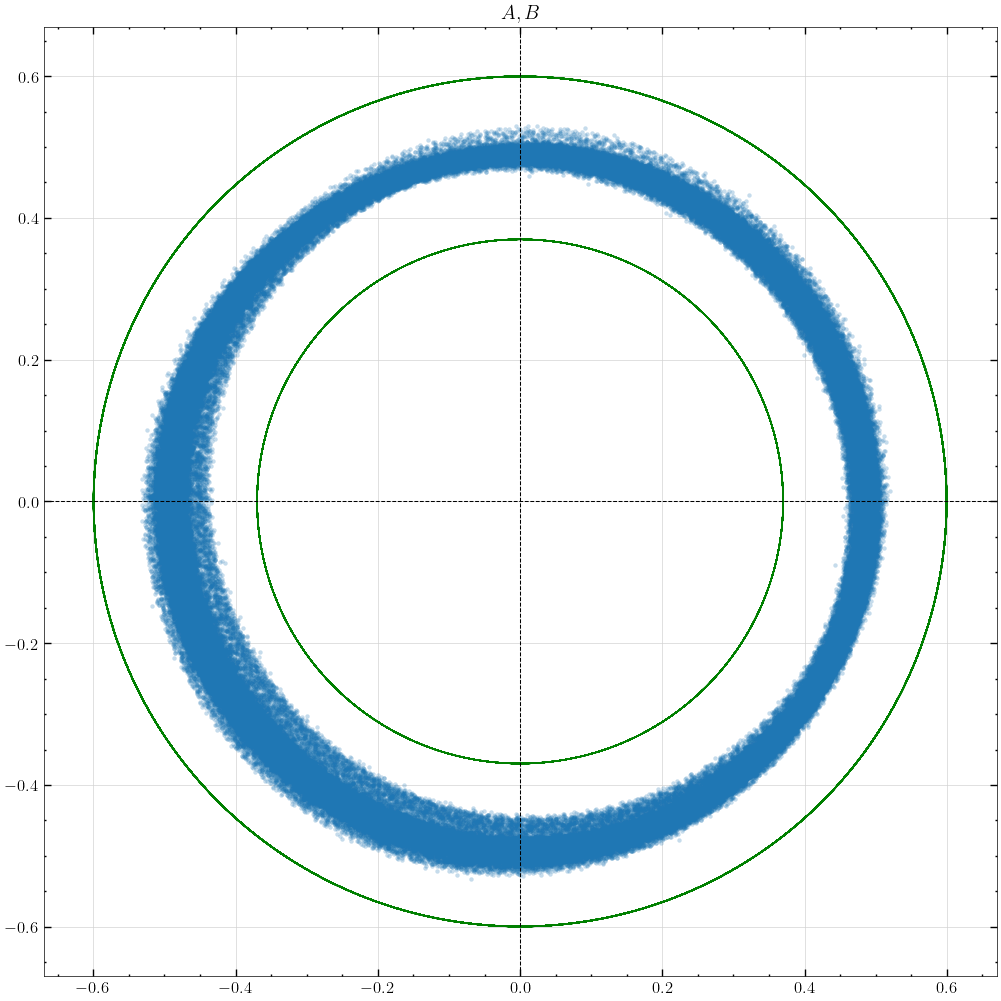

In [109]:
x = np.linspace(0,1000,10000)
y = 0.6 *np.sin(1*x+0)+0
yy = 0.6 *np.sin(1*x+np.pi/2)+0
w = 0.37 *np.sin(1*x+0)+0
ww = 0.37 *np.sin(1*x+np.pi/2)+0
fig = plt.subplots(figsize=(10,10), layout='constrained')
plt.title("$A,B$")
plt.plot(y,yy, lw = 0.75,color = 'g')
plt.plot(w,ww, lw = 0.75,color = 'g')
# plt.scatter(a,b, linewidths= 0.1, marker=".", alpha=0.005)
plt.scatter(a[0:len(a)//6],b[0:len(b)//6], linewidths= 0.1, marker=".", alpha=0.25)
plt.xlim(-0.67,0.67)
plt.ylim(-0.67,0.67)
plt.vlines(0,-0.67,0.67,color = 'k', linestyles='--',lw = 0.75)
plt.hlines(0,-0.67,0.67,color = 'k', linestyles='--',lw = 0.75)
plt.savefig("eqn_kola.png")
# plt.show()